In [1]:
from nltk.corpus import webtext
from nltk.corpus import gutenberg
import seaborn

# Datasets

For each of the datasets we will show how long they are e.g. average text length and in the case of the Emma novel if it can be easily broken up into pages/paragraphs.

## Jane Austin Emma



In [20]:
# Loading the corpus
emma = gutenberg.raw('austen-emma.txt')
print(f'The first 500 characters from the Emma novel:\n{emma[:500]}\n')
print(f'The length of the novel in characters: {len(emma)}')

The first 500 characters from the Emma novel:
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t

The length of the novel in characters: 887071


As we can see the whole novel in characters is 887,071, however as we have printed the first 500 characters the paragraph appear to be already split up through two sequential link breaks. Lets see if we can get all of the paragraphs out: 

In [16]:
emma_paragraphs = emma.split('\n\n')
print(f'Paragraph 4:\n{emma_paragraphs[3]}\n\nParagraph 5\n{emma_paragraphs[4]}')
print(f'\n\nTotal number of paragraphs in Emma {len(emma_paragraphs)}')

Paragraph 4:

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

Paragraph 5
She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


Total number of paragraphs in Emma 2427


Before finishing it would be of interest to see the distribution of the number of characters per paragraph within Emma.

Longest paragraph in length: 14885
Median paragraph length: 234


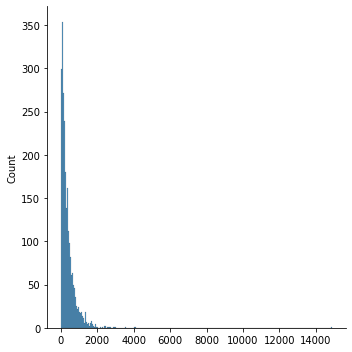

In [53]:
from statistics import median

chars_in_paragraph = sorted([len(paragraph) for paragraph in emma_paragraphs])
print(f'Longest paragraph in length: {chars_in_paragraph[-1]}')
print(f'Median paragraph length: {median(chars_in_paragraph)}')
seaborn.displot(chars_in_paragraph) 

From this we can see in general most paragaphs are below 2000 characters long but some can be really long (14,885) which skewed the graph, so lets do the graph again but removing the top and bottom 2.5% thus having 95% of the distribution left:

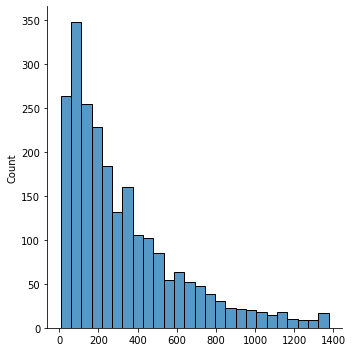

In [50]:
a_percent = len(chars_in_paragraph) // 100
chars_in_paragraph = chars_in_paragraph[int(a_percent * 2.5):]
chars_in_paragraph = chars_in_paragraph[:int(len(chars_in_paragraph) - (a_percent * 2.5))]
seaborn.displot(chars_in_paragraph) 

From this new plot it is easier to see the bound of the length of characters in each paragraph.

## Wine reviews

In [19]:
# Loading the corpus
wine = webtext.raw('wine.txt')
print(f'The first 500 characters from the Wine reviews:\n{wine[:500]}\n')
print(f'The length of the reviews in characters: {len(wine)}')

The first 500 characters from the Wine reviews:
Lovely delicate, fragrant Rhone wine. Polished leather and strawberries. Perhaps a bit dilute, but good for drinking now. ***
Liquorice, cherry fruit. Simple and coarse at the finish. **
Thin and completely uninspiring. *
Rough. No Stars
Big, fat, textured Chardonnay - nuts and butterscotch. A slightly odd metallic/cardboard finish, but probably ***
A blind tasting, other than the fizz, which included five vintages of Cote Rotie Brune et Blonde from Guigal.
Surprisingly young feeling and drinkin

The length of the reviews in characters: 149772


It appears that each review is on one line as at the end of each line is a star rating denoted through `*`, in one case through text `No Stars`, some have also given no review as is the case in `A blind tasting, other than the fizz, which included five vintages of Cote Rotie Brune et Blonde from Guigal.`. 

In [26]:
wine_lines = [line for line in wine.split('\n') if line.strip()]
print(f'First review\n{wine_lines[0]}\n')
print(f'Sixth review\n{wine_lines[6]}\n')
print(f'Number of wine reviews {len(wine_lines)}')

First review
Lovely delicate, fragrant Rhone wine. Polished leather and strawberries. Perhaps a bit dilute, but good for drinking now. ***

Sixth review
Surprisingly young feeling and drinking well, but without any great complexity. A good ***

Number of wine reviews 1230


We can see in the plot below that there are much fewer character in each sentence/review compared to the paragraphs within the Emma novel.

Longest review in characters: 936
Median review length: 96.0


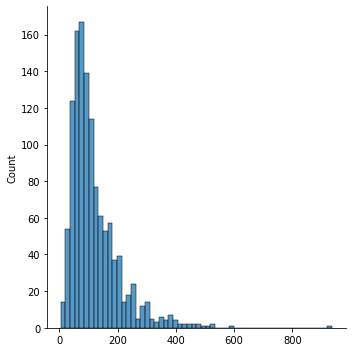

In [54]:
lines_in_chars = sorted([len(line) for line in wine_lines])
print(f'Longest review in characters: {lines_in_chars[-1]}')
print(f'Median review length: {median(lines_in_chars)}')
seaborn.displot(lines_in_chars)